<h1 style="text-align:Center; color:orange;">- iPython Notebook -</h1>

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h4 style="text-align:center; color:blue;">Andrew W. Brooks</h4>
<h4 style="text-align:center; color:blue;">Vanderbilt Genetics Institute</h4>
<h4 style="text-align:center; color:blue;">andrew.w.brooks(at)vanderbilt.edu</h4>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

In [1]:
######################################################
### LOAD USEFUL TOOLS ################################
### MODULES:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
### SCRIPTS:
sys.path.append("/Users/brooks/brooks_utilities/scripts/")
import python_utilities as p


<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h3 style="text-align:Center; color:orange;">- SEARCH -</h3>

In [39]:
#################################################
################# SEARCH ########################    
import glob

### SEARCH FUNCTION ### regex search files (returns list of files matching regex expression)
def search(searchStr):
    return glob.glob(searchStr)

### SEARCH FUNCTION ### print a list of found search items
def search_print(inList):
    for idx, idi in enumerate(inList): print "   "+str(idx)+". "+idi

### SEARCH FUNCTION ### search and list all files in directory
def search_all(searchPath='./'):
    search_print(search(searchPath + '*'))

search_all()

   0. ./brooks.bash_profile
   1. ./notebooks
   2. ./resources
   3. ./scripts
   4. ./template.ipynb
   5. ./Untitled.ipynb


<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h3 style="text-align:Center; color:orange;">- DATE & TIME -</h3>

In [13]:
#################################################    
################## DATE #########################
import time

### DATE FUNCTION ### return date & time as user readable string (returns string)
def date_print():
    dateStr = "Date: "+date_date()+" Time: "+date_time()
    return dateStr

### DATE FUNCTION ### get date (returns month_day_year string) 
def date_date():
    return time.strftime("%m_%d_%Y")

### DATE FUNCTION ### get time (return hour_minute_second string)
def date_time():
    return time.strftime("%H:%M:%S")

print date_date()
print date_time()
print date_print()

05_16_2016
10:44:06
Date: 05_16_2016 Time: 10:44:06


<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h3 style="text-align:Center; color:orange;">- DIRECTORY -</h3>

In [ ]:
#################################################
################ DIRECTORY ######################
### DIRECTORY PIPELINE ### make output directory (returns bool and path string)
def dir_pipe(dir_path, overwrite=False):
    dir_path = dir_backslash(dir_path)           # Append backslash to end
    if not dir_check(dir_path):                  # If directory does not exist...
        dir_make(dir_path)                       # Then make directory
    elif overwrite:                              # Else if does exist and overwrite...
        dir_remove(dir_path);dir_make(dir_path)  # Then remove and remake
    if dir_check(dir_path): return True, dir_path# If Exists now then return
    else: return False, ""                       # Else return false

### DIRECTORY FUNCTION ### check if directory exists (returns bool true==exists)
def dir_check(dirPath):
    if os.path.isdir(dirPath): return True

### DIRECTORY FUNCTION ### make_directory (returns string of cwd/dir_path)
def dir_make(dirPath):
    os.makedirs(dirPath)
    
### DIRECTORY FUNCTION ### remove_directory (returns string of cwd/dir_path)
def dir_remove(dirPath):
    shutil.rmtree(dirPath)

### DIRECTORY FUNCTION ### append '/' to dir_path if not present (return string dir_path)
def dir_backslash(dirPath):
    if dirPath[-1] != '/': dirPath = dirPath+'/' # ADD '/' TO END IF NOT PRESENT
    return dirPath

### DIRECTORY FUNCTION ### get fullpath to directory (returns string of cwd/dir_path)
def dir_fullpath(dirPath):
    return os.path.abspath(dirPath)
    
### DIRECTORY FUNCTION ### get fullpath to cwd directory (returns string of cwd/dir_path)
def dir_localpath(dirPath):
    return str(os.getcwd())+'/'+dirPath # ADD FULLPATH

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h3 style="text-align:Center; color:orange;">- FILE -</h3>

In [ ]:
#################################################
################## FILE #########################
### FILE FUNCTION ### check if file exists (return bool)
def file_check(filePath):
    return os.path.isfile(filePath)

### FILE FUNCTION ### get seconds since last access of file (number)
def file_lasttime(filePath):
    return os.path.getatime(filePath)

### FILE FUNCTION ### get after last '/' in filepath as string
def file_basename(filePath):
    return os.path.basename(filePath)

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h3 style="text-align:Center; color:orange;">- INTEGER -</h3>

In [ ]:
#########################################################################################
################# INTEGER ###############################################################

################## INPUT ####################
### INPUT FUNCTION ### get raw user input, evaluate if int (return bool, int)
def input_int(qStr = "  --- INPUT INTEGER ---> "):
    inputIn = raw_input(qStr)
    return eval_int(inputIn)
    
### INPUT FUNCTION ### get raw user input, evaluate if int range (return bool, [start,finish])
def input_ints(minRange=0,maxRange=10000000):
    inputIn = raw_input("  --- Input Integer Range(s): ex. 1:3,4,7: (: for all) ---> "); indexOut = []
    inputIn = inputIn.split(',')           # Split by ','
    for inSx, inS in enumerate(inputIn):   # for each split...
        inS2 = inS.split(':'); sectStore=[]# Split by ':'
        for inS3x,inS3 in enumerate(inS2): # for each split...
            eBool, eVal = eval_int(inS3)   # Evaluate if int
            if not eBool:                  # if not int...
                if inS3 == '':             # if ' ' or ':' then...
                    if inS3x == 0: eVal = minRange; eBool=True # if first then minRange
                    else: eVal = maxRange; eBool=True  # if last then maxRange
                else: print "  Not an Integer (Ignored): "+str(inS3); break
            sectStore.append(eVal)
        if eBool == True: indexOut.append(sectStore)
    return indexOut

################# EVALUATE ##################
### EVALUATE FUNCTION ### returns true, # if number can be coerced to int
def eval_int(intIn):
    try: int(intIn); return True, int(intIn)     # Try coercing to int - return true, int
    except ValueError: return False, None        # Otherwise return false, None


In [ ]:
#################################################
################## NUMBERS ######################
### NUMBERS FUNCTION ### get absolute number
def num_abs(numIn):
    return abs(numIn)

### NUMBERS FUNCTION ### takes in a list or array and returns generator (for i in generator:)
def num_chunks(listIn, chunkSize):
    for chunkBlock in range(0, len(listIn), chunkSize): 
        yield listIn[chunkBlock:chunkBlock+chunkSize]


In [ ]:
#################################################
################## PRINT ########################
### PRINT FUNCTION ### enumerate through list and print #. value
def print_enumlist(listIn):
    for eIdx, eVal in enumerate(listIn): print "  "+str(eIdx)+". "+str(eVal)

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:Center; color:orange;">- PANDAS -</h1>

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:Center; color:orange;">- PANDAS -</h1>

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:Center; color:orange;">- PLOTTING -</h1>
<h3 style="text-align:Center; color:orange;">- SEABORN -</h3>

In [50]:
### SEABORN - DISTRIBUTION PLOT ###
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(xIn):
    sns.distplot(xIn)
    plt.show()

#X1 = [0,1,2,3,4,6,8,5,3,6,3,5,7,5,7,8,4,3,2,4,5,3,5,4,6,4,5,6,3,5,9,10,11]
#plot_distribution(X1)

#X2 = [9,12,22,33,43,65,81,54,33,68,93,56,74,52,75,87,44,32,25,43,54,35,55,43,63,45,53,65,33,58,95,10,11]
#plot_distribution(X2)


In [ ]:
    ##### INTITALIZE FIGURE #####
    #############################
    ### FIGURE SIZE ###:
    xSize = 5                                # xSize in inches
    ySize = 5                                # ySize in inches
    fig = plt.figure(figsize=(xSize,ySize))  # Set figure size
    #############################
    ### SUBPLOT GRID ###:
    #import matplotlib.gridspec as gridspec   # Import gridspec
    #xGridPositions = 2
    #yGridPositions = 2
    #gs = gridspec.GridSpec(yGridPositions, xGridPositions) # Setup Grid Positions
    #ax1 = plt.subplot(gs[:, :]) #ax1 = plt.subplot(gs[yGridsV, xGrids>]) # i.e. 0,: = [  ax1   ] 

In [106]:
sns.set(style="white", color_codes=True)
tips = sns.load_dataset("tips")


# yIn and yIn can be numeric vectors... or if dataFrame provided can be strings of column titles
def jointplot(xIn, yIn, dataFrame=None):
   
    sns.jointplot(xIn, yIn, data=dataFrame, size=5, kind="reg", ratio=5, color='r', space=.1, dropna=False, xlim=(-10,70), ylim=(0,10))
    sns.jointplot(xIn, yIn, data=dataFrame, size=5, kind="resid")
    sns.jointplot(xIn, yIn, data=dataFrame, size=5, kind="hex")
    sns.jointplot(xIn, yIn, data=dataFrame, size=5, kind="kde", color='g')

jointplot("total_bill", "tip", dataFrame=tips)

NameError: global name 'spearmanr' is not defined

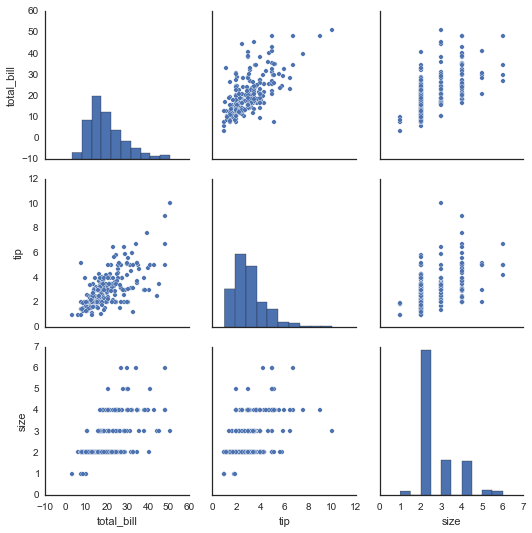

In [80]:
sns.pairplot(tips)

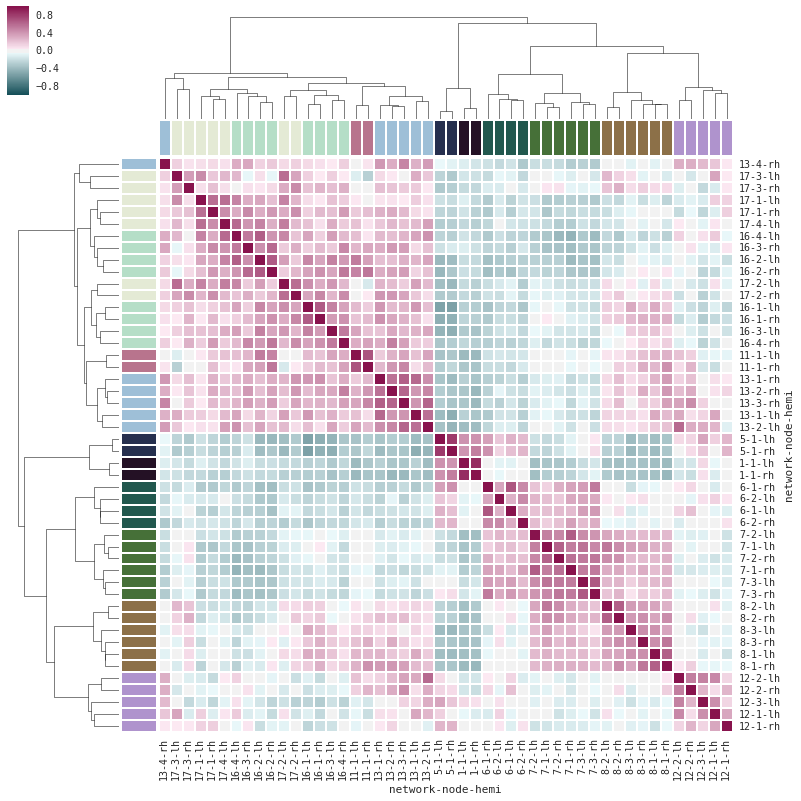

In [30]:
import pandas as pd
import seaborn as sns
sns.set(font="monospace")

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks).map(network_lut)

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)
plt.show()

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h3 style="text-align:Center; color:orange;">- PANDAS -</h3>

In [2]:
#########################################################################################
################# PANDAS ################################################################
import pandas as pd

class pandas_class():
    
    ##########################
    ### PANDAS Constructor ###
    def __init__(self):
        self.df = None
        return
    
    ### PANDAS MAKE EMPTY DF ### construct a dataframe given lists of colsIn X indexIn
    def empty(self, colsIn, indexIn):
        self.df = pd.DataFrame(columns=colsIn, index=indexIn)
    
    ### PANDAS PIPELINE ### user interface for inputting pandas dataframe
    def input(fpIn, sepIn='\t', indexCol=None, skipRows=0):
        ### SET DEFAULT OPTIONS
        nRowIn = 10       # SET NUMBER OF ROWS TO DISPLAY
        nColIn = 10       # SET NUMBER OF COLUMNS TO DISPLAY
        verboseIn=False   # SET PANDAS VERBOSE MODE
        inputInt = 1000   # USER INTERFACE VARIABLE (INT)
        ### ENTER LOOP FOR USER INTERFACE...
        while inputInt != 0:
            #######################
            ### OPTIONS ###########
            ### 1 - INDEX COLUMN
            if inputInt == 1: boolInt, indexCol = input_int(qStr = "      --- SELECT INDEX COLUMN ---> ")
            ### 2 - SKIP ROWS
            if inputInt == 2: boolInt, skipRows = input_int(qStr = "      --- SKIP # ROWS ---> ")
        
            ### 3 - 
            #######################
            ### INPUT DATAFRAME
            dfIn = pd.read_csv(fpIn, sep=sepIn, index_col=indexCol, skiprows=skipRows, verbose=verboseIn)
            pd_display_options(maxRows = nRowIn, maxCols = nColIn, textWrap = False)
            ### DISPLAY TABLE
            print dfIn
            #######################
            ### PRINT USER OPTIONS ###
            print "   0. CONTINUE - Accept Current Table"
            print "   1. INDEX COLUMN - Select Index Column"
            print "   2. SKIP ROWS - Skip First X Rows"
            boolInt, inputInt = input_int(qStr = "   --- INPUT OPTION ---> ")
    
        return dfIn
    
    ### PANDAS FILL ROW BY INDEX ### fills data into indexIn row
    # dataIn must fill all columns
    def row_fill(self, iIn, dataIn):
        self.df.loc[iIn] = dataIn
    
    ### PANDAS FILL COLUMN  ### fills data into colIn column
    # dataIn must fill all index rows
    def col_fill(self, cIn, dataIn):
        self.df[cIn] = dataIn
    
    ### PANDAS FILL BOTH COLUMN AND INDEX POSITION  ### fills data specific location
    # dataIn must be a single point (i.e. integer or string)
    def pos_fill(self, iIn, cIn, dataIn):
        self.df.loc[iIn, cIn] = dataIn
    
    ### PANDAS EXPORT TO CSV  ### exports df as csv to locIn
    def export_csv(self, locIn):
        self.df.to_csv(locIn)
    
    ### PANDAS DISPLAY OPTIONS ### set display options for pandas dataframes
    def display_options(textWrap = False, maxRows = 10, maxCols = 10):
        ### TEXT WRAP ###
        pd.set_option('expand_frame_repr', textWrap)
        ### MAX ROWS ###
        # pd.get_option("display.max_rows")
        pd.set_option("display.max_rows", maxRows)
        ### MAX COLUMNS ###
        # pd.get_option("display.max_columns")
        pd.set_option("display.max_columns", maxCols)
        return

    
    
    
    
x = pandas_class()
x.empty(['a','b','c'],[1,2,3,4])
x.col_fill('a',[1,2,3,4])
x.row_fill(1, [1,2,3])
x.pos_fill(4,'c',100)

    
def empty_df(colsIn, indexIn):
    # CREATE PANDAS STORAGE DATAFRAME
    obs = pd.DataFrame(columns=colsIn, index=indexIn)

def fill_row(dfIn, indexIn, dataIn):
    dfIn.loc[indexIn] = dataIn
    